In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


## Análise de Negócios
### Preços dos combustíveis ofertados nos postos

<img src = 'preco_combustivel.jpeg'>|

### Fomos contratados por uma Petroleira para construir uma análise de negócios para entender a dinâmica de preços que está sendo ofertado pelos postos.
1 - Teremos que trabalhar com Dados Existentes <br/>
link: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis <br/>
<img src = 'anp.png'><br/>
<br/>
Como foi uma solicitação do nosso cliente, teremos que avaliar os ultimos 5 anos da base de dados.<br/>
<img src = 'tabela_base_dados.png'><br/>

<br/>
Quando abrimos as tabelas nos deparamos que cada semestre possui uma quantidade muito grande de dados, logo juntas 5 anos (10 tabelas) fica difícil!<br/>
<br/>
Como muitas das vezes não temos o Engenheiro de Dados, temos que dar os nossos pulos!<br/>


2 - Armazenar esses dados em um banco de dados <br/>
<img src = 'PostgreSQL-logo.png'><br/>
<img src = 'postgre1.png'><br/>

In [2]:
"""
CREATE TABLE anp.preco_combustivel(
		regiao 				varchar(255)
		,estado				varchar(255)
		,municipio			varchar(255)
		,revenda			varchar(255)
		,cnpj				varchar(255)
		,nome_rua			varchar(255)	
		,numero_rua			varchar(255)
		,complemento		varchar(255)
		,bairro				varchar(255)
		,cep				varchar(255)
		,produto			varchar(255)
		,data_coleta		date
		,valor_venda		float
		,unidade_medida		varchar(255)
		,bandeira			varchar(255)

)
"""

'\nCREATE TABLE anp.preco_combustivel(\n\t\tregiao \t\t\t\tvarchar(255)\n\t\t,estado\t\t\t\tvarchar(255)\n\t\t,municipio\t\t\tvarchar(255)\n\t\t,revenda\t\t\tvarchar(255)\n\t\t,cnpj\t\t\t\tvarchar(255)\n\t\t,nome_rua\t\t\tvarchar(255)\t\n\t\t,numero_rua\t\t\tvarchar(255)\n\t\t,complemento\t\tvarchar(255)\n\t\t,bairro\t\t\t\tvarchar(255)\n\t\t,cep\t\t\t\tvarchar(255)\n\t\t,produto\t\t\tvarchar(255)\n\t\t,data_coleta\t\tdate\n\t\t,valor_venda\t\tfloat\n\t\t,unidade_medida\t\tvarchar(255)\n\t\t,bandeira\t\t\tvarchar(255)\n\n)\n'

Carga de dados no Banco! <br/>
Utilizaremos o Knime<br/>
<img src = 'knime.png'><br/>
<img src = 'knime2.png'><br/>
Para atender as nossas necessidades vamos construir desta forma.<br/>
<img src = 'knime3.png'><br/>

3 - Utilizar esses dados para as nossas análises <br/>

Instalando as bibliotecas

In [3]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps

In [5]:
conn = ps.connect(dbname = 'postgres',
                    user ='postgres',
                    password = '1234',
                    host = 'localhost',
                    port = '5432' )

In [6]:
sql = """
SELECT * FROM anp.preco_combustivel
"""

In [7]:
df = sqlio.read_sql_query(sql, conn)

/tmp/ipykernel_36673/76855033.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql, conn)


In [8]:
df.head()

,regiao,estado,municipio,revenda,cnpj,nome_rua,numero_rua,complemento,bairro,cep,produto,data_coleta,valor_venda,unidade_medida,bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,None,LACE,29703-030,GASOLINA ADITIVADA,2022-07-01,7.48,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,None,LACE,29703-030,GASOLINA,2022-07-01,7.38,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,DIESEL S10,2022-07-01,7.69,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,2022-07-01,5.99,R$ / litro,VIBRA ENERGIA
4,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,2022-07-01,7.39,R$ / litro,VIBRA ENERGIA


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   regiao          378078 non-null  object 
 1   estado          378078 non-null  object 
 2   municipio       378078 non-null  object 
 3   revenda         378078 non-null  object 
 4   cnpj            378078 non-null  object 
 5   nome_rua        378078 non-null  object 
 6   numero_rua      377902 non-null  object 
 7   complemento     80547 non-null   object 
 8   bairro          377177 non-null  object 
 9   cep             378078 non-null  object 
 10  produto         378078 non-null  object 
 11  data_coleta     378078 non-null  object 
 12  valor_venda     378078 non-null  float64
 13  unidade_medida  378078 non-null  object 
 14  bandeira        378078 non-null  object 
dtypes: float64(1), object(14)
memory usage: 43.3+ MB


In [10]:
print(f'Quantidade de linhas e colunas {df.shape}')

Quantidade de linhas e colunas (378078, 15)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   regiao          378078 non-null  object 
 1   estado          378078 non-null  object 
 2   municipio       378078 non-null  object 
 3   revenda         378078 non-null  object 
 4   cnpj            378078 non-null  object 
 5   nome_rua        378078 non-null  object 
 6   numero_rua      377902 non-null  object 
 7   complemento     80547 non-null   object 
 8   bairro          377177 non-null  object 
 9   cep             378078 non-null  object 
 10  produto         378078 non-null  object 
 11  data_coleta     378078 non-null  object 
 12  valor_venda     378078 non-null  float64
 13  unidade_medida  378078 non-null  object 
 14  bandeira        378078 non-null  object 
dtypes: float64(1), object(14)
memory usage: 43.3+ MB


In [12]:
df['data_coleta']= pd.to_datetime(df['data_coleta'])


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378078 entries, 0 to 378077
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   regiao          378078 non-null  object        
 1   estado          378078 non-null  object        
 2   municipio       378078 non-null  object        
 3   revenda         378078 non-null  object        
 4   cnpj            378078 non-null  object        
 5   nome_rua        378078 non-null  object        
 6   numero_rua      377902 non-null  object        
 7   complemento     80547 non-null   object        
 8   bairro          377177 non-null  object        
 9   cep             378078 non-null  object        
 10  produto         378078 non-null  object        
 11  data_coleta     378078 non-null  datetime64[ns]
 12  valor_venda     378078 non-null  float64       
 13  unidade_medida  378078 non-null  object        
 14  bandeira        378078 non-null  obj

In [14]:
df.isnull().sum()


regiao                 0
estado                 0
municipio              0
revenda                0
cnpj                   0
nome_rua               0
numero_rua           176
complemento       297531
bairro               901
cep                    0
produto                0
data_coleta            0
valor_venda            0
unidade_medida         0
bandeira               0
dtype: int64

Selecionar as colunas que vamos trabalhar
regiao, estado, municipio, produto, data_coleta, valor_venda, bandeira



In [15]:
df_anp = df[['data_coleta', 'regiao', 'estado', 'municipio', 'bandeira','produto', 'valor_venda']]


In [16]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda
0,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA ADITIVADA,7.48
1,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.38
2,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,DIESEL S10,7.69
3,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,ETANOL,5.99
4,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.39


In [17]:
df_anp['ano'] = df_anp['data_coleta'].dt.year
df_anp['mes'] = df_anp['data_coleta'].dt.month


/tmp/ipykernel_36673/276816859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['ano'] = df_anp['data_coleta'].dt.year
/tmp/ipykernel_36673/276816859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anp['mes'] = df_anp['data_coleta'].dt.month


In [18]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA ADITIVADA,7.48,2022,7
1,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.38,2022,7
2,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,DIESEL S10,7.69,2022,7
3,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,ETANOL,5.99,2022,7
4,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.39,2022,7


In [19]:
#Estatística Básica

df_anp.describe().round(2)

,data_coleta,valor_venda,ano,mes
count,378078,378078.00,378078.0,378078.00
mean,2022-09-15 23:44:36.533413632,5.64,2022.0,9.03
min,2022-07-01 00:00:00,2.49,2022.0,7.00
25%,2022-08-01 00:00:00,4.85,2022.0,8.00
50%,2022-08-31 00:00:00,5.49,2022.0,8.00
75%,2022-11-07 00:00:00,6.65,2022.0,11.00
max,2022-12-30 00:00:00,9.65,2022.0,12.00
std,NaN,1.20,0.0,1.75


Quais são os tipos de produtos que são comercializados?



In [20]:
#Visualizando os valores únicos
print(f'Os produtos conecializados{df_anp.produto.unique()}')


Os produtos conecializados['GASOLINA ADITIVADA' 'GASOLINA' 'DIESEL S10' 'ETANOL' 'DIESEL' 'GNV']


Quais anos estão na Base?


In [21]:
#Visualizando os valores únicos
print(f'Os anos da Base: {df_anp.ano.unique()}')


Os anos da Base: [2022]


Descobrindo os valores mínimos, máximos e médios dos produtos por ano


In [22]:
df_anp_valor = df_anp[['ano', 'produto', 'valor_venda']]


In [23]:
df_anp_valor.groupby(['produto','ano']).agg(['min', 'max', 'mean']).round(2)


valor_venda            
                                min   max  mean
produto            ano                         
DIESEL             2022        3.14  9.00  6.97
DIESEL S10         2022        3.59  9.65  7.08
ETANOL             2022        2.49  7.89  4.21
GASOLINA           2022        3.49  8.75  5.35
GASOLINA ADITIVADA 2022        4.09  9.28  5.52
GNV                2022        3.18  7.99  5.10

In [24]:
df_anp_valor_estado = df_anp[['ano', 'produto', 'estado','valor_venda']]


In [25]:
df_anp_valor_estado.groupby(['produto','ano','estado']).agg(['min', 'max', 'mean']).round(2)


valor_venda            
                            min   max  mean
produto ano  estado                        
DIESEL  2022 AC            6.42  8.95  7.92
             AL            4.87  8.52  7.24
             AM            6.39  9.00  7.11
             AP            6.22  7.89  7.00
             BA            4.60  8.75  7.15
...                         ...   ...   ...
GNV     2022 RN            4.11  4.79  4.33
             RS            4.92  6.88  5.76
             SC            4.99  6.89  5.95
             SE            5.02  5.16  5.13
             SP            4.45  6.99  5.41

[153 rows x 3 columns]

Descobrir a quantidade de bandeiras por produto/ano



In [26]:
df_anp_bandeira = df_anp[['ano','bandeira','produto']]


In [27]:
df_anp_bandeira.groupby(['ano','produto']).bandeira.nunique()

ano   produto           
2022  DIESEL                51
      DIESEL S10            58
      ETANOL                59
      GASOLINA              59
      GASOLINA ADITIVADA    57
      GNV                   22
Name: bandeira, dtype: int64

In [28]:
df_anp_bandeira_estado = df_anp[['ano','bandeira','produto', 'estado']]

In [29]:
df_anp_bandeira_estado.groupby(['ano','produto','estado']).bandeira.nunique()

ano   produto  estado
2022  DIESEL   AC        8
               AL        5
               AM        8
               AP        3
               BA        8
                        ..
      GNV      RN        5
               RS        5
               SC        8
               SE        5
               SP        7
Name: bandeira, Length: 153, dtype: int64

# Criando as visualizações de dados



In [35]:
#pip install matplotlib
# !pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.8 MB/s eta 0:00:00a 0:00:01


In [36]:
#graficos
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df_anp.head()

,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA ADITIVADA,7.48,2022,7
1,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.38,2022,7
2,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,DIESEL S10,7.69,2022,7
3,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,ETANOL,5.99,2022,7
4,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.39,2022,7


In [38]:
df_anp['produto'].unique()


array(['GASOLINA ADITIVADA', 'GASOLINA', 'DIESEL S10', 'ETANOL', 'DIESEL',
       'GNV'], dtype=object)

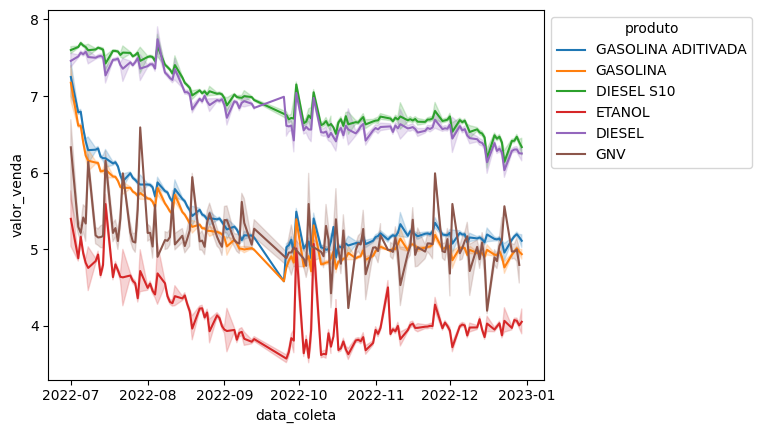

In [39]:
ax = sns.lineplot(data = df_anp, x="data_coleta", y ='valor_venda',   hue="produto")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


## Separando o Dataset para entender um pouquinho melhor a nossa base

In [40]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']


Criando funções que auxiliam a plotar gráficos.

In [49]:
def plotar_boxplot_2V(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.boxplot(x=x, y= y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)


In [42]:
def plotar_boxplot_geral(y, dataset):
    ax = sns.boxplot(y=y, data=dataset)
    ax.figure.set_size_inches(4,4)


## Analisando os combustíveis

### Gasolina Aditivada - 2018/2022



In [43]:
# Estatística básica de cada produto
print('Gasolina Aditivada')
gasolina_aditivada.valor_venda.describe().round(2)


Gasolina Aditivada


count    73068.00
mean         5.52
std          0.58
min          4.09
25%          5.09
50%          5.39
75%          5.87
max          9.28
Name: valor_venda, dtype: float64

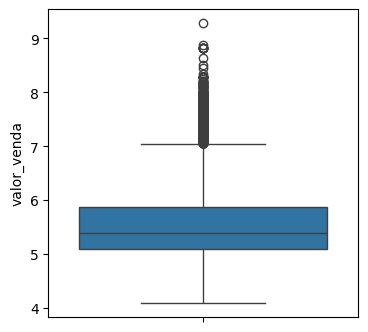

In [44]:
plotar_boxplot_geral('valor_venda', gasolina_aditivada)


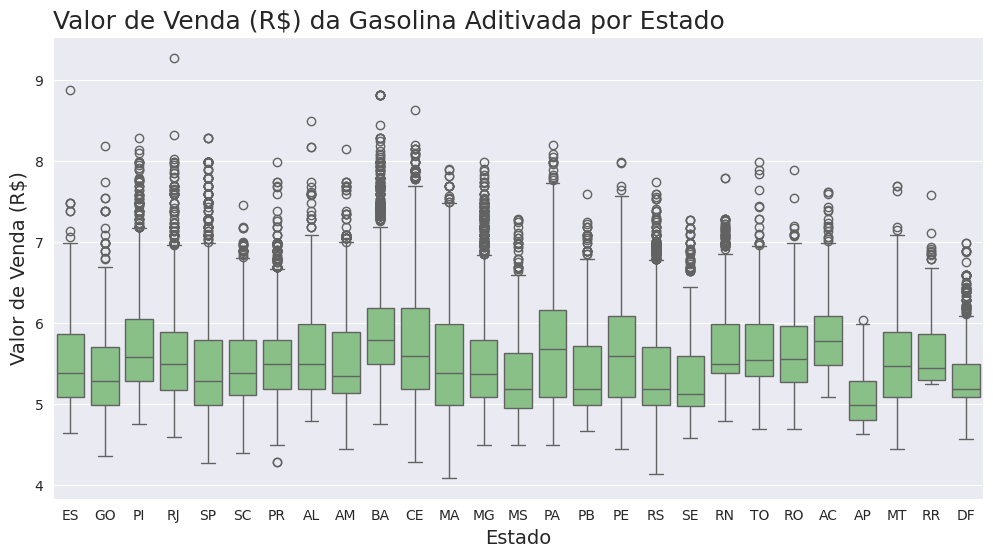

In [50]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Aditivada por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina_aditivada)


### Gasolina Comum



In [46]:
print('Gasolina Comum')
gasolina.valor_venda.describe().round(2)


Gasolina Comum


count    96323.00
mean         5.35
std          0.57
min          3.49
25%          4.89
50%          5.25
75%          5.69
max          8.75
Name: valor_venda, dtype: float64

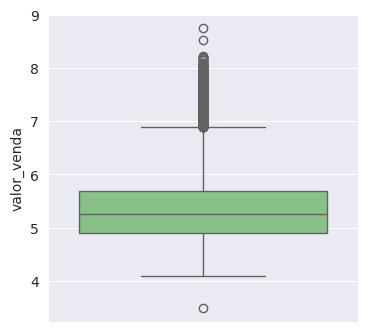

In [47]:
plotar_boxplot_geral('valor_venda', gasolina)


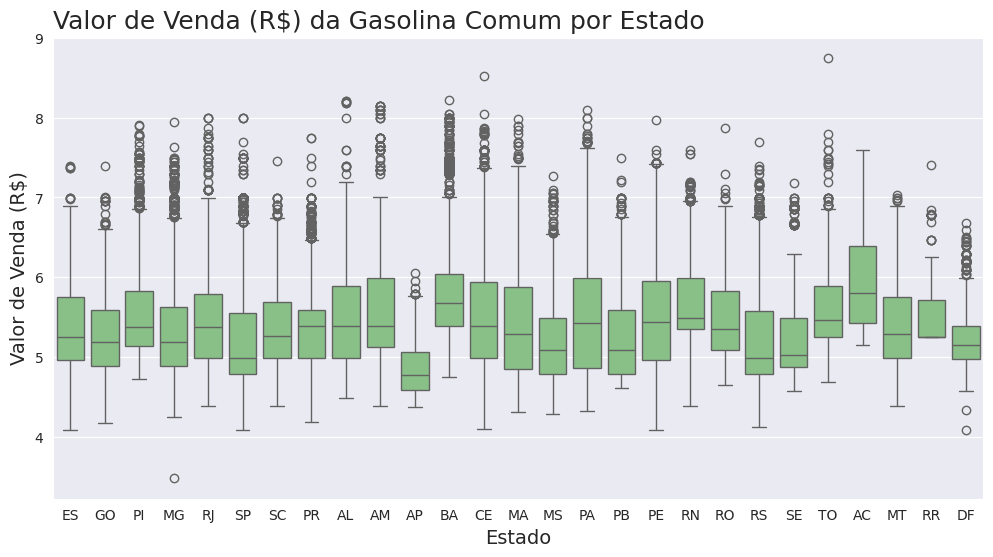

In [48]:
plotar_boxplot_2V('Valor de Venda (R$) da Gasolina Comum por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gasolina)


### Diesel S10

In [52]:
print('Diesel S10')
diesel_s10.valor_venda.describe().round(2)


Diesel S10


count    74662.00
mean         7.08
std          0.51
min          3.59
25%          6.69
50%          7.04
75%          7.49
max          9.65
Name: valor_venda, dtype: float64

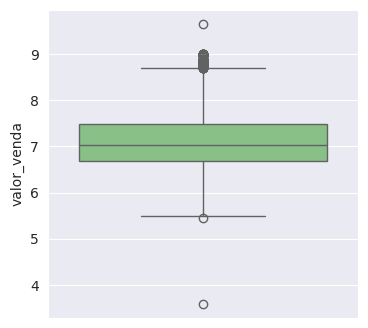

In [53]:
plotar_boxplot_geral('valor_venda', diesel_s10)


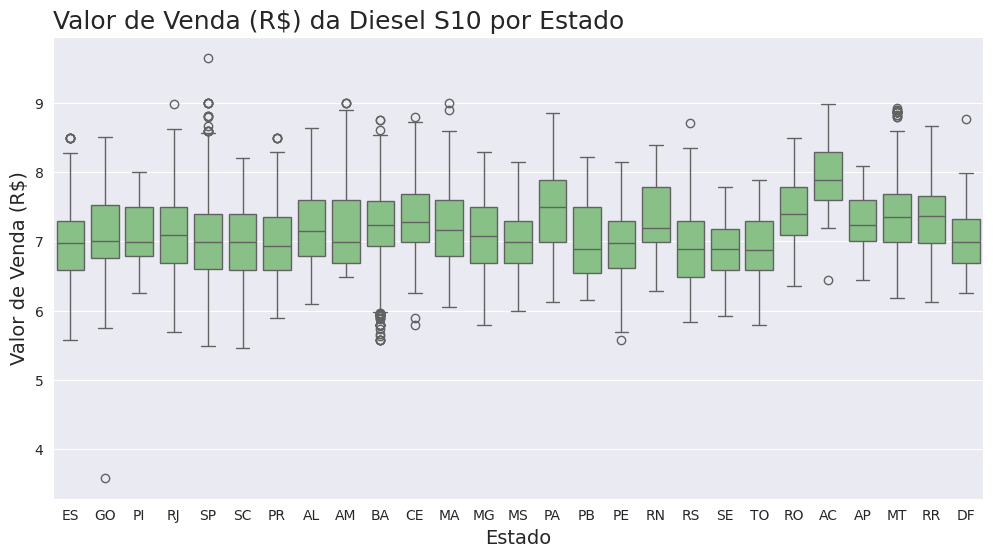

In [54]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel S10 por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel_s10)


In [55]:
#Separando o dataset
gasolina_aditivada = df_anp.loc[df['produto']=='GASOLINA ADITIVADA']
gasolina = df_anp.loc[df['produto']=='GASOLINA']
diesel_s10 = df_anp.loc[df['produto']=='DIESEL S10']
diesel = df_anp.loc[df['produto']=='DIESEL']
etanol = df_anp.loc[df['produto']=='ETANOL']
gnv = df_anp.loc[df['produto']=='GNV']


### Diesel

In [56]:
print('Diesel')
diesel.valor_venda.describe().round(2)


Diesel


count    41762.00
mean         6.97
std          0.52
min          3.14
25%          6.59
50%          6.96
75%          7.38
max          9.00
Name: valor_venda, dtype: float64

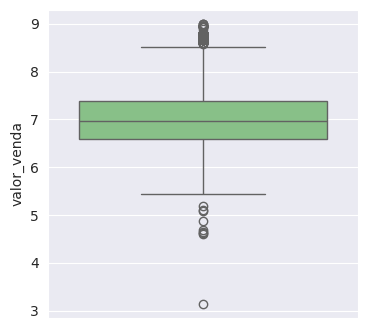

In [57]:
plotar_boxplot_geral('valor_venda', diesel)


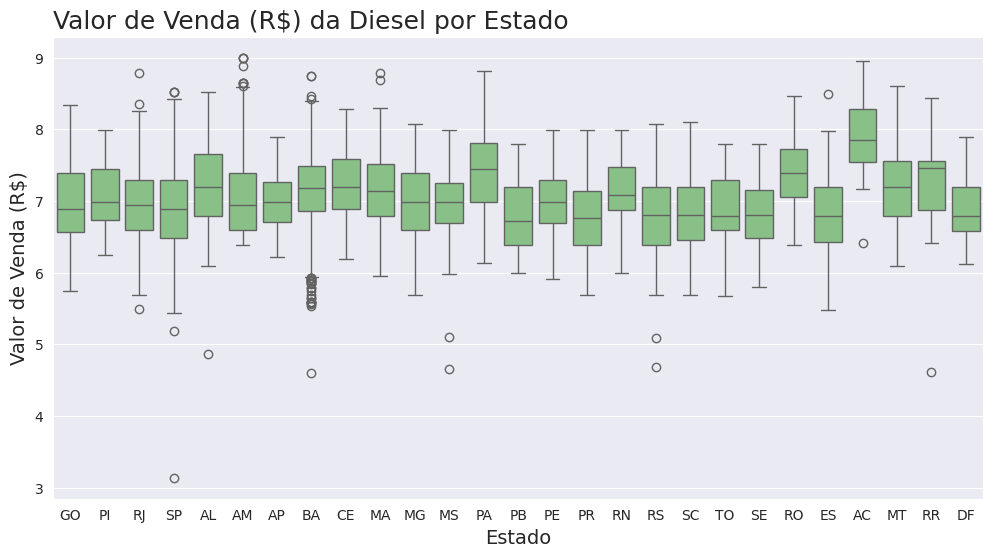

In [58]:
plotar_boxplot_2V('Valor de Venda (R$) da Diesel por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        diesel)


### GNV

In [59]:
print('GNV')
gnv.valor_venda.describe().round(2)


GNV


count    7735.00
mean        5.10
std         0.58
min         3.18
25%         4.73
50%         4.99
75%         5.49
max         7.99
Name: valor_venda, dtype: float64

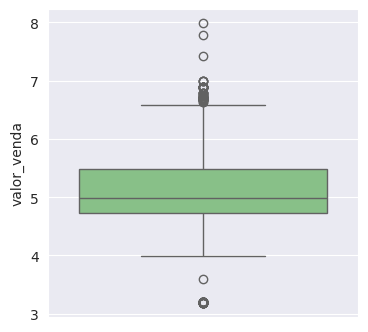

In [60]:
plotar_boxplot_geral('valor_venda', gnv)


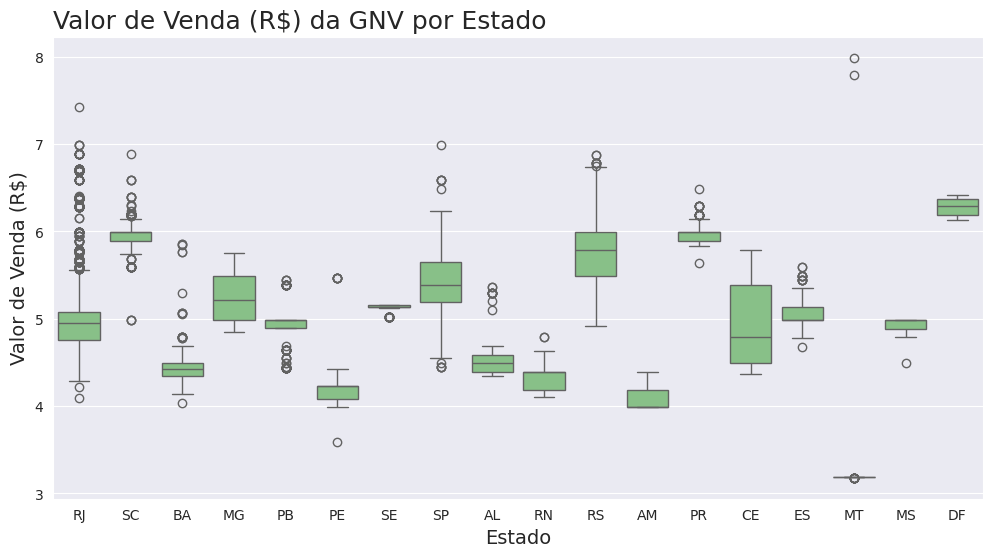

In [61]:
plotar_boxplot_2V('Valor de Venda (R$) da GNV por Estado',
        'Estado',
        'Valor de Venda (R$)',
        'estado',
        'valor_venda',
        gnv)


## Quantidade de Bandeiras distribuidoras de combustível



In [62]:
df_anp.head()


,data_coleta,regiao,estado,municipio,bandeira,produto,valor_venda,ano,mes
0,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA ADITIVADA,7.48,2022,7
1,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.38,2022,7
2,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,DIESEL S10,7.69,2022,7
3,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,ETANOL,5.99,2022,7
4,2022-07-01,SE,ES,COLATINA,VIBRA ENERGIA,GASOLINA,7.39,2022,7


In [63]:
df_anp['bandeira'].nunique()


59

In [64]:
df_anp['bandeira'].unique()


array(['VIBRA ENERGIA', 'IPIRANGA', 'BRANCA', 'RAIZEN', 'REJAILE',
       'RODOIL', "ATEM' S", 'ALESAT', 'SP', 'TOTALENERGIES', 'SABBÁ',
       'FEDERAL ENERGIA', 'DISLUB', 'TEMAPE', 'ESTRADA', 'IDAZA', 'STANG',
       'RAIZEN MIME', 'PETROX DISTRIBUIDORA', 'PETROBAHIA', 'TAURUS',
       'CIAPETRO', 'CHARRUA', 'EQUADOR', 'SETTA DISTRIBUIDORA',
       'MASUT DISTRIBUIDORA', 'RIO BRANCO', 'RZD DISTRIBUIDORA',
       'SUL COMBUSTÍVEIS', 'SIMARELLI', 'SMALL', 'TDC DISTRIBUIDORA',
       'PETROSERRA', 'ATLÂNTICA', 'FAN', 'MAXSUL', 'DIBRAPE',
       'WALENDOWSKY', 'WATT', 'POTENCIAL', 'ROYAL FIC', 'UNI',
       'MONTEPETRO', 'TORRAO', 'PELIKANO', 'AMERICANOIL', 'LARCO',
       'RUFF C.J.', 'PETRONAC', 'SUPERGASBRAS ENERGIA', 'LIQUIGÁS',
       'FOGAS', 'NACIONAL GÁS BUTANO', 'BAHIANA', 'ULTRAGAZ', 'AMAZONGÁS',
       'ON PETRO', 'D`MAIS', 'PETROBRASIL'], dtype=object)

In [65]:
bandeiras_estado = df_anp_bandeira_estado.groupby('estado').bandeira.nunique().reset_index()


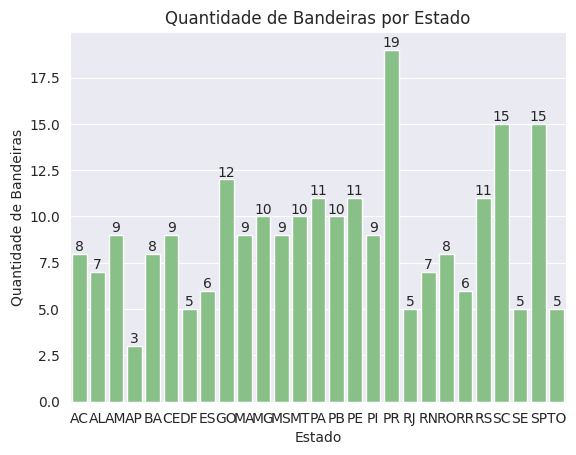

In [66]:
sns.barplot(x='estado', y='bandeira', data=bandeiras_estado)

plt.title('Quantidade de Bandeiras por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Bandeiras')

for index, row in bandeiras_estado.iterrows():
    plt.annotate(row['bandeira'], xy=(index, row['bandeira']), ha='center', va='bottom')

plt.show()
